# Project1 - Team 5, Studio 1

Annie Chu, SeungU Lyu

### Question: What would the age demographics be in 15 years if the US implemented an one-child policy?

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

# importing "copy" for copy operations 
import copy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

### Initial Data Pulls

#### Initial Population Data by Age Range and Gender (0-4, 5-9, etc)

In [3]:
pop_init_data = pd.read_csv('data/pop_2017_US.csv', index_col='age')

,male,female
age,,
4,10195968,9742892
9,10368141,9936097
14,10605072,10173382
19,10800491,10331169
24,11349142,10769493
29,11902230,11468230
34,11089131,10883081
39,10615985,10616012
44,9753115,9890258


Source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

#### Death Rate Data by Age Group and Gender (0, 1-4, 5-9, etc)

In [4]:
death_rate_data = pd.read_csv('data/age_death_rate.csv', index_col='age')

,male,female
age,,
0,0.006392,0.005377
4,0.000280,0.000216
9,0.000132,0.000102
14,0.000169,0.000122
19,0.000666,0.000291
24,0.001299,0.000465
29,0.001505,0.000608
34,0.001709,0.000835
39,0.001985,0.001101


Source: https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/

#### Probability of Woman Ever Having a Child by Age Group (15-19, 20-24, etc)

In [5]:
child_ever_data = pd.read_csv('data/child_ever_born.csv', index_col='age')

,percentage
age,
19,0.051
24,0.286
29,0.506
34,0.718
39,0.828
44,0.849
49,0.832


Source: Fertility of Women in the United States: 2012, Lindsay M. Monte and Renee R. Ellis

#### Probability of Woman Having First Child by Age

In [6]:
first_birth_data = pd.read_csv('data/first_birth_rate.csv', index_col='age')

,percentage
age,
15,0.0090
16,0.0182
17,0.0314
18,0.0470
19,0.0597
20,0.0661
21,0.0664
22,0.0650
23,0.0655


Source: https://www.cdc.gov/nchs/nvss/births.htm

#### Adapting Initial Population Data into Age Groups

In [7]:
male_pop = linspace(0,0,90)
female_pop = linspace(0,0,90)

ident = 4
for i in range(90):
    if i>ident:
        ident += 5
    male_pop[i] = int(pop_init_data.male[ident]/5)
    female_pop[i] = int(pop_init_data.female[ident]/5)

In [8]:
female_pop[0] #test

1948578.0

#### Setting Initial Population State by Gender

In [9]:
init_population = State(male = male_pop, female = female_pop)

,values
male,"[2039193.0, 2039193.0, 2039193.0, 2039193.0, 2..."
female,"[1948578.0, 1948578.0, 1948578.0, 1948578.0, 1..."


#### Setting Parameters

In [10]:
system = System(male_death = death_rate_data.male,
               female_death = death_rate_data.female,
               child_ever = child_ever_data.percentage,
               first_rate = first_birth_data.percentage,
               t_0 = 2018,
               t_end = 2100,
               init_pop = init_population)

,values
male_death,age 0 0.006392 4 0.000280 9 0.0001...
female_death,age 0 0.005377 4 0.000216 9 0.0001...
child_ever,age 19 0.051 24 0.286 29 0.506 34 ...
first_rate,age 15 0.0090 16 0.0182 17 0.0314 18 ...
t_0,2018
t_end,2100
init_pop,"male [2039193.0, 2039193.0, 2039193.0, 20..."


#### Splitting Initial Female Population --> Female w/ no children, Female w/ children

In [11]:
population = State(male = copy.deepcopy(system.init_pop.male), female = copy.deepcopy(system.init_pop.female), female_w = linspace(0,0,90))

,values
male,"[2039193.0, 2039193.0, 2039193.0, 2039193.0, 2..."
female,"[1948578.0, 1948578.0, 1948578.0, 1948578.0, 1..."
female_w,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#### Assigning Population Value to 2 Female Groups Above

In [12]:
ident = 19
for i in range(15,49):
    if i>ident:
        ident += 5
    population.female_w[i] = int(population.female[i]*system.child_ever[ident])
    population.female[i] = int(population.female[i]*(1-system.child_ever[ident]))

Implementation of Death Rate to 3 Groups

In [13]:
def update_func_death(state,system):
    ident = 4
    state.male[0] = int(state.male[0] * (1-system.male_death[0]))
    state.female[0] = int(state.female[0] * (1-system.female_death[0]))
    for i in range(1,90):
        if i>ident:
            ident += 5
        state.male[i] = int(state.male[i] * (1-system.male_death[ident]))
        state.female[i] = int(state.female[i] * (1-system.female_death[ident]))
        state.female_w[i] = int(state.female_w[i] * (1-system.female_death[ident]))
    return state

Implementation of Birth Rate: Creating Newborns + Shifting Relevant Female Population

In [14]:
def update_func_birth(state,system):
    baby_total = 0
    for i in range(15,50):
        baby = int(state.female[i]*system.first_rate[i])
        state.female[i] -= baby
        state.female_w[i] += baby
        baby_total += baby
    return baby_total

Updating Population Age + New Births

In [15]:
def update_func_pop(baby,state,system):
    for i in range(89):
        k = 89-i
        state.male[k] = state.male[k-1]
        state.female[k] = state.female[k-1]
        state.female_w[k] = state.female_w[k-1]
    state.male[0] = int(baby/2)
    state.female[0] = int(baby/2)
    return state

Adding to find total population 

In [16]:
def addall(state):
    total = 0
    for i in range(90):
        total = total + state.male[i] + state.female[i] + state.female_w[i]
    return total

Adding Population of 3 Groups Based on Defined Age Groups

In [17]:
def agedemos(num_s, num_e, state):
    age_total = 0
    for i in range(num_s, num_e+1):
        age_total = age_total + state.male[i] + state.female[i] + state.female_w[i]
    return age_total

In [18]:
def run_population(system, state, update_func_death, update_func_birth, update_func_pop, addall):
    nstate = State(male = copy.deepcopy(state.male), female = copy.deepcopy(state.female), female_w = copy.deepcopy(state.female_w))
    results = TimeSeries()
    for t in linrange(system.t_0, system.t_end):
        nstate = update_func_death(nstate,system)
        baby = update_func_birth(nstate,system)
        nstate = update_func_pop(baby,nstate,system)
        totalpop = addall(nstate)
        results[t+1] = totalpop
    return results

In [19]:
def age_group(system, state, update_func_death, update_func_birth, update_func_pop, agedemos):
    nstate = State(male = copy.deepcopy(state.male), female = copy.deepcopy(state.female), female_w = copy.deepcopy(state.female_w))
    demo_state = State(ag_one = TimeSeries(), ag_two = TimeSeries(), ag_three = TimeSeries(), ag_four = TimeSeries(), ag_five = TimeSeries())
    for t in linrange(system.t_0, system.t_end):
        nstate = update_func_death(nstate,system)
        baby = update_func_birth(nstate,system)
        nstate = update_func_pop(baby,nstate,system)
        demo_state.ag_one[t+1] = agedemos(0,14,nstate)
        demo_state.ag_two[t+1] = agedemos(15,30,nstate)
        demo_state.ag_three[t+1] = agedemos(31,49,nstate)
        demo_state.ag_four[t+1] = agedemos(50,70,nstate)
        demo_state.ag_five[t+1] = agedemos(71,89,nstate)
    return demo_state

In [20]:
def age_group_per(system, state, update_func_death, update_func_birth, update_func_pop, agedemos, addall):
    nstate = State(male = copy.deepcopy(state.male), female = copy.deepcopy(state.female), female_w = copy.deepcopy(state.female_w))
    demo_state = State(ag_one = TimeSeries(), ag_two = TimeSeries(), ag_three = TimeSeries(), ag_four = TimeSeries(), ag_five = TimeSeries())
    for t in linrange(system.t_0, system.t_end):
        nstate = update_func_death(nstate,system)
        baby = update_func_birth(nstate,system)
        nstate = update_func_pop(baby,nstate,system)
        totalpop = addall(nstate)
        demo_state.ag_one[t+1] = agedemos(0,14,nstate)*100/totalpop
        demo_state.ag_two[t+1] = agedemos(15,30,nstate)*100/totalpop
        demo_state.ag_three[t+1] = agedemos(31,50,nstate)*100/totalpop
        demo_state.ag_four[t+1] = agedemos(51,70,nstate)*100/totalpop
        demo_state.ag_five[t+1] = agedemos(71,89,nstate)*100/totalpop
    return demo_state

In [21]:
demo = age_group(system, population, update_func_death, update_func_birth, update_func_pop, agedemos)

,values
ag_one,2019 58637396.0 2020 56262942.0 2021 ...
ag_two,2019 70720957.0 2020 70151983.0 2021 ...
ag_three,2019 79473524.0 2020 79807552.0 2021 ...
ag_four,2019 83694002.0 2020 83818946.0 2021 ...
ag_five,2019 31059531.0 2020 31644211.0 2021 ...


In [22]:
demo_per = age_group_per(system, population, update_func_death, update_func_birth, update_func_pop, agedemos, addall)

,values
ag_one,2019 18.121150 2020 17.490039 2021 16...
ag_two,2019 21.855422 2020 21.807621 2021 21...
ag_three,2019 25.852632 2020 26.105134 2021 26...
ag_four,2019 24.572239 2020 24.760208 2021 24...
ag_five,2019 9.598557 2020 9.836999 2021 10...


In [23]:
results = run_population(system, population, update_func_death, update_func_birth, update_func_pop, addall)

,values
2019,323585410.0
2020,321685634.0
2021,319959654.0
2022,318366671.0
2023,316874166.0
2024,315459106.0
2025,313994933.0
2026,312487013.0
2027,310938794.0
2028,309353184.0


In [24]:
check = TimeSeries()
for i in linrange(system.t_0, system.t_end):
    check = demo.ag_one + demo.ag_two + demo.ag_three + demo.ag_four + demo.ag_five
check


2019    323585410.0
2020    321685634.0
2021    319959654.0
2022    318366671.0
2023    316874166.0
2024    315459106.0
2025    313994933.0
2026    312487013.0
2027    310938794.0
2028    309353184.0
2029    307539441.0
2030    305657560.0
2031    303717676.0
2032    301727870.0
2033    299695062.0
2034    297388016.0
2035    295024948.0
2036    292604835.0
2037    290121696.0
2038    287567289.0
2039    284729694.0
2040    281815596.0
2041    278833845.0
2042    275793501.0
2043    272701238.0
2044    269409817.0
2045    266080664.0
2046    262715206.0
2047    259315092.0
2048    255882640.0
           ...     
2071    173515996.0
2072    169808906.0
2073    166096722.0
2074    162351587.0
2075    158610000.0
2076    154873955.0
2077    151145225.0
2078    147425435.0
2079    143660114.0
2080    139933102.0
2081    136242264.0
2082    132585772.0
2083    128962060.0
2084    125422342.0
2085    121922265.0
2086    118460069.0
2087    115034174.0
2088    111643189.0
2089    108325188.0


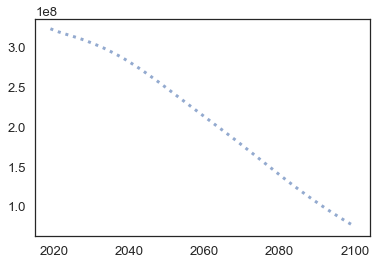

In [25]:
plot(results, ':')

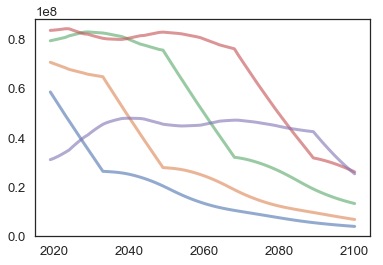

In [26]:
plot(demo.ag_one)
plot(demo.ag_two)
plot(demo.ag_three)
plot(demo.ag_four)
plot(demo.ag_five)
#plot(results)

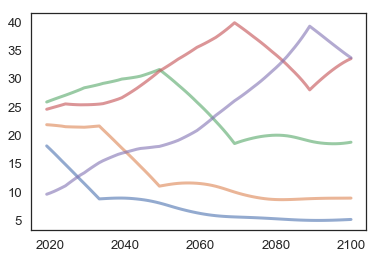

In [27]:
plot(demo_per.ag_one)
plot(demo_per.ag_two)
plot(demo_per.ag_three)
plot(demo_per.ag_four)
plot(demo_per.ag_five)

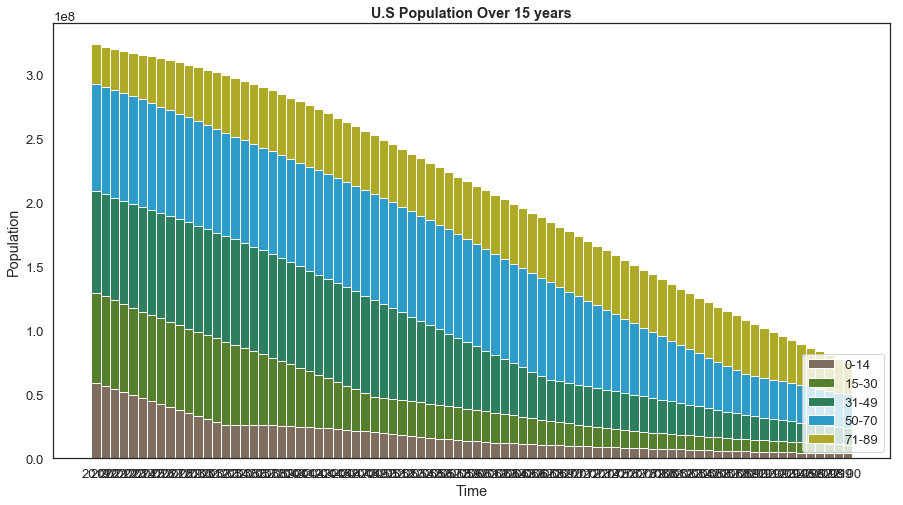

In [31]:
# Values of each group
bars1 = demo.ag_one
bars2 = demo.ag_two
bars3 = demo.ag_three
bars4 = demo.ag_four
bars5 = demo.ag_five

# The position of the bars on the x-axis-timerange
r = linrange(system.t_0+1, system.t_end+1)

#setting bar width
barWidth = 1

plt.figure(figsize=(15, 8))
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars1+bars2, color='#2d7f5e', edgecolor='white', width=barWidth)
# Create Blue bars
plt.bar(r, bars4, bottom=bars1+bars2+bars3, color='#2E9BC8', edgecolor='white', width=barWidth)
#Create yellow bars
plt.bar(r, bars5, bottom=bars1+bars2+bars3+bars4, color='#AFA928', edgecolor='white', width=barWidth)
 
# Custom axis
plt.xticks(r)
plt.xlabel("Time")
plt.ylabel("Population")
plt.title('U.S Population Over 15 years', fontweight = 'bold')
group = ['0-14','15-30','31-49','50-70','71-89']
plt.legend(group,loc=4)
 
# Show graphic
plt.show()


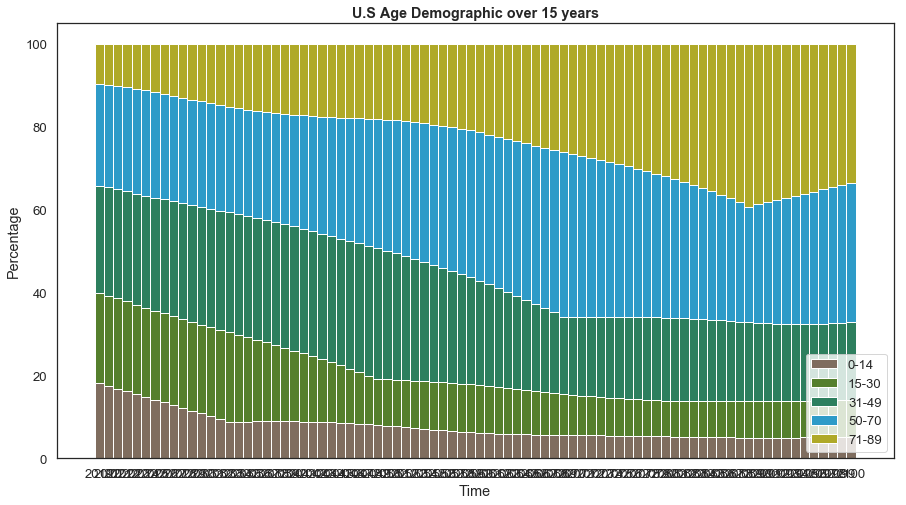

In [30]:
# Values of each group
bars1 = demo_per.ag_one
bars2 = demo_per.ag_two
bars3 = demo_per.ag_three
bars4 = demo_per.ag_four
bars5 = demo_per.ag_five

# The position of the bars on the x-axis-timerange
r = linrange(system.t_0+1, system.t_end+1)

#setting bar width
barWidth = 1

plt.figure(figsize=(15, 8))
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars1+bars2, color='#2d7f5e', edgecolor='white', width=barWidth)
# Create Blue bars
plt.bar(r, bars4, bottom=bars1+bars2+bars3, color='#2E9BC8', edgecolor='white', width=barWidth)
#Create yellow bars
plt.bar(r, bars5, bottom=bars1+bars2+bars3+bars4, color='#AFA928', edgecolor='white', width=barWidth)
 
# Custom axis
plt.xticks(r)
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.title('U.S Age Demographic over 15 years', fontweight = 'bold')

group = ['0-14','15-30','31-49','50-70','71-89']
plt.legend(group,loc=4)
 
# Show graphic
plt.show()

Methods
Parameters: 
1. Initial Population by age and gender group.
2. Death rate by age and gender group.
3. First birth rate for women by age group.
4. Probability of child birth gender (assume 50/50?)
5. Percentage of women with child ever born

State: 
1. Updated population by age and gender group
2. Time


Limitations:

1. Not accounting for twins
2. birth/death rate assuming constant for next 15 years
3. Assumption of gender birth ratio
4. No immigrants
5. Data not the most recent 


Results
1. Compare with US Gov Data for projected future population number 
2. Plot general population vs time (line graph)
3. Plot general populations (with subsections of age groups) vs time (bar graph)


To Do List
1. 3 Update Functions
2. Assume 50/50 gender birth ratio
3. Graph (to test, after each updatefunc?)

